# MoMA Project : Principal Component Analysis
## Name: Chirag Bhuvaneshwara
## Mr. Nr.: 2571703

In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
from PIL import Image

In [2]:
"""
Function takes in a matrix, calculates it's transpose

Calculates covariance matrix = matrix_t * matrix if not square matrix
Finds e-vecs of covariance matrix
These e-vecs are the right singular vectors

Returns the right singular vectors of the input matrix.
"""

def right_singular_vecs(matrix):
    
    matrix_t = np.matrix.transpose(matrix)
    #If matrix is not square
    if not(matrix.shape[0] == matrix.shape[1]):
        C = np.matmul(matrix_t,matrix)
    
        #The "np.linalg.eigh" function returns e-vals and e-vecs in ascending order.
        e_vals, e_vecs = np.linalg.eigh(C)
    
        #Singular values are always in Descending Order
        #So changing the order of the vectors to match the order of Singular values.        
        new_e_vecs = np.fliplr(e_vecs)
        right_singular_vecs = np.matrix(new_e_vecs)
    
    #If matrix is square:
    else:
        e_vals, e_vecs = np.linalg.eigh(matrix)
        new_e_vecs = np.fliplr(e_vecs)
        right_singular_vecs = np.matrix(new_e_vecs)
           
    
    return right_singular_vecs

In [3]:
"""
Function takes in matrix, calculates it's transpose and it's order

If the matrix is taller than it is wider:
It considers the covariance matrix formed by
matrix * matrix_t, finds the singular values and forms 
the matrix of singular values

or if matrix is square:
The eigenvalues of the matrix are the singular values

Else:
Does the same things by considering matrix_t * matrix
as the covariance matrix.

Returns the matrix of singualr values
"""

def singular_vals_matrix(matrix):
    
    matrix_t = np.matrix.transpose(matrix)
    matrix_order = matrix.shape
    
    ##If matrix is taller than wider i.e. the no. of rows > no. of cols
    if matrix_order[0] > matrix_order[1] :
        
        C = np.matmul(matrix,matrix_t)
        e_vals, e_vecs = np.linalg.eigh(C)
        #Arrange e_vals in descending order
        e_vals = np.sort(e_vals)[::-1]
        e_vals = np.abs(e_vals)
        singular_vals = np.sqrt(e_vals)
        
        
        singular_vals_matrix = np.diagflat(singular_vals)
        
        stop = matrix_order[1]
        
        singular_vals_matrix = singular_vals_matrix[:,:stop:]
    
    #If matrix is square:
    elif matrix_order[0] == matrix_order[1]:
        
        e_vals, e_vecs = np.linalg.eigh(matrix)
        e_vals = np.sort(e_vals)[::-1]
        e_vals = np.abs(e_vals)
        singular_vals = np.sqrt(e_vals)
        singular_vals_matrix = np.diagflat(singular_vals)
        
    ##If matrix is wider than talller i.e. the no. of cols > no. of rows
    else:
        
        C = np.matmul(matrix_t,matrix)
        e_vals, e_vecs = np.linalg.eigh(C)
        ## Arrange e_vals in descending order
        e_vals = np.sort(e_vals)[::-1]
        e_vals = np.abs(e_vals)
        singular_vals = np.sqrt(e_vals)
        stop = matrix_order[0]
        singular_vals_matrix = np.diagflat(singular_vals)[:stop:,:]
    
    return singular_vals, singular_vals_matrix

In [4]:
"""
Function takes in singular values, matrix, right singular vectors

Calculates matrix's transpose and shape

Returns the left singular vectors of the input matrix.
"""

def left_singular_vecs(singular_values, matrix, right_singular_vecs):
    
    matrix_t = np.matrix.transpose(matrix)
    matrix_order = matrix.shape
      
    U = np.matrix(np.empty([matrix_order[0], matrix_order[0]]))
        
    #If matrix is more taller than it is wider i.e more rows than columns:
    if matrix_order[0] > matrix_order[1]:
        e_vals, e_vecs = np.linalg.eigh(np.matmul(matrix, matrix_t))
        e_vecs = np.matrix(np.fliplr(e_vecs))
        start = matrix_order[0] - matrix_order[1]
        for i in range(start,e_vecs.shape[1]):
            U[:,i] = e_vecs[:,i] 
            
          
        for i in range(0, matrix_order[1]):
            onebysigma = (1/singular_values[i])
            U[:,i] = (onebysigma * np.matmul (matrix, right_singular_vecs[:,i]))

        
    #If matrix is more wider than it is taller i.e more columns than rows:
    # or if matrix is square
    else:
        for i in range(0, matrix_order[0]):
            onebysigma = (1/singular_values[i])
            U[:,i] = (onebysigma * np.matmul (matrix, right_singular_vecs[:,i]))
        
        
    return U

In [5]:
"""
Function takes in matrix, calculates it's transpose, and it's order

Calculates left and right singular vectors and the matrix of singular values

Returns left singular vectors, matrix of singular values and
transpose of right singular vectors and singular values.
"""
def SVD(matrix):
      
    singular_values, sigma = singular_vals_matrix(matrix)
    V = right_singular_vecs(matrix)
    
    V_t = np.matrix.transpose(V)
    
    U = left_singular_vecs(singular_values, matrix, V)
        
    return (U,sigma,V_t,singular_values)

In [6]:
"""
Function takes in left singular vetors, matrix of singular values 
and transpose of right singular values

Reconstructs the matrix from SVD decomposition components

Returns reconstructed matrix
"""
def recon(left_singular_vecs, matrix_singular_vals, right_singular_vecs_t):
    
    # Matrix multiplication: U * sigma * V_t
    svd_recon = np.matmul(np.matmul(left_singular_vecs,matrix_singular_vals),right_singular_vecs_t)
    
    return svd_recon

In [7]:
"""
Function takes in 2D image matrix and percetage of variance required

Finds number of principal components required to retain specified amount
of vairance in image and reconstructs the image by considering the
principal components, thereby compressing the image.

Returns matrix reconstructed using the principal components and the principal components

"""

def pca(image_matrix, reqd_variance):
    
       
    matrix = image_matrix
    matrix_t = np.matrix.transpose(matrix)
    matrix_order = matrix.shape
    
    mean = np.mean(matrix)
    matrix = matrix - mean
    
    U, sigma, V_t, singular_vals = SVD(matrix)
    
      
    all_singular_vals_sum = np.sum(singular_vals)
    
    for k in range(0,len(singular_vals)):
        singular_vals_to_k = singular_vals[:k:]
        singular_vals_sum_to_k = np.sum(singular_vals_to_k)
        
        if(singular_vals_sum_to_k / all_singular_vals_sum) < (reqd_variance/100):
            principal_comps = k
    
    
    
    singular_vals[principal_comps+1::] = 0
    pca_singular_vals = singular_vals
    
    ##If the no. of rows > no. of cols
    if matrix_order[0] > matrix_order[1] :
        
        stop = matrix_order[1]
        
        pca_sigma = np.diagflat(pca_singular_vals)[:,:stop:]
        
        
    ##If the no. of cols > no. of rows
    else:
        
        stop = matrix_order[0]
        pca_sigma = np.diagflat(pca_singular_vals)[:stop:,:]

    
    max_pixel_intensity = 255
    pca_recon = recon(U, pca_sigma, V_t) + mean
    pca_recon[pca_recon > 255] = max_pixel_intensity
    
    
    return pca_recon, principal_comps

In [8]:
"""
Function takes in a matrix and its pca reconstruction

Computes MSE and PSNR

Returns MSE and PSNR
"""

def mse_and_psnr(matrix, pca_recon):
    
    diff= np.abs(matrix-pca_recon)
    mse = np.mean(np.square(diff))
    max_pixel_intensity = 255
    psnr = 10 * np.log10((255**2)/mse)
    
    return mse, psnr

In [9]:
"""
Function takes in no input

Performs a series of checks to determine that the user inputs proper variance

Returns the variance specified by the user
"""

def user_input():
    
    print("You can input required variance or it'll be considered as 99%.")
    user_in = input("Do you want to specify percentage of variance required in reconstructed image? Type Y/N: \n")
    
    #User wants to input:
    if user_in == "Y":
        specified_variance_string = input("Please specify the amount of variance required in the compressed image between 1 to 99 \n (usually between 90 to 99 is good) \n")
        
        if specified_variance_string.isdigit():
            
            specified_variance = int(specified_variance_string)
            
            if not(0< specified_variance <100 ):
                
                print("Variance MUST be between 0 and 100")
                specified_variance =0
        
        else:
            specified_variance = int(specified_variance_string)
    
    
    #No user input        
    elif user_in == "N":
        specified_variance = 99
    
    #Invalid input
    else:
        print("Invalid input. Please input only Y/N")
        specified_variance = 0
    
    while specified_variance == 0:
        specified_variance = user_input()
        
    return specified_variance

In [10]:
"""
Function takes in an image

Converts it into 2D gray scale matrix
Performs SVD and computes matrix from SVD components
Plots the original image and the SVD reconstruction image

Returns nothing

"""

def svd_analysis(img):
    # convert to gray scale
    img = img.convert('L', (0.2989, 0.5870, 0.1140, 0)) 
    #converting image matrix entries to np arrays
    img = np.asarray(img, dtype='float32')
    matrix = img

    U, sigma, V_t, singular_vals = SVD(matrix)

    svd_recon = recon(U, sigma, V_t)

    print("Original image matrix entries: \n", matrix)

    print("\n \n")
    print("SVD reconstructed image matrix entries: \n", svd_recon)
    
    plt.rcParams["figure.figsize"] = [14,14]
    plt.subplot(121)
    plt.title('Input image')
    plt.imshow(img, cmap='gray')


    plt.subplot(122)
    plt.imshow(matrix, cmap='gray')
    plt.title('SVD reconstruction image')
    plt.show()

In [11]:
"""
Function takes in an image

Converts it into 2D gray scale matrix
Plots Variance vs MSE & Variance vs PSNR
Plots Number of Prinicpal componets vs MSE &
Number of Prinicpal componets vs PSNR

Returns nothing
"""

def pc_analysis(img):
    
    # convert to gray scale
    img = img.convert('L', (0.2989, 0.5870, 0.1140, 0)) 
    #converting image matrix entries to np arrays
    img = np.asarray(img, dtype='float32')
    
    matrix = img
    
    mse_vals = []
    psnr_vals = []
    variance_vals = list(range(1,100))
    principal_comps_vals = []

    for variance in variance_vals:
   
        pca_recon, principal_comps = pca(matrix, variance)
    
        principal_comps_vals = np.append(principal_comps_vals, principal_comps)
        
        mse_vals = np.append(mse_vals,mse_and_psnr(matrix, pca_recon)[0])
        
        psnr_vals = np.append(psnr_vals,mse_and_psnr(matrix, pca_recon)[1])
        
    plt.rcParams["figure.figsize"] = [12,12]
    plt.subplot(221)   
    plt.plot(variance_vals, psnr_vals)
    plt.xlabel("Variance in %")
    #print("ASD:",type(plt.xlabel),type(plt.ylabel))
    plt.ylabel("PSNR in log scale")
    
    plt.subplot(222)
    plt.xlabel("Variance in %")
    plt.ylabel("MSE")
    plt.plot(variance_vals, mse_vals)

        
    plt.subplot(223)
    plt.xlabel("Num of Principal comps.")
    plt.ylabel("PSNR in log scale")
    plt.plot(principal_comps_vals, psnr_vals)
    
    
    plt.subplot(224)
    plt.xlabel("Num of Principal comps.")
    plt.ylabel("MSE")
    plt.plot(principal_comps_vals, mse_vals)
    
    
    plt.show()
    

In [12]:
"""
Function takes in an image

Converts it into 2D gray scale matrix
Asks user to input variance required
Plots original, PCA reconstructed and the image of difference between them

Returns nothing
"""

def for_specific_variance(img):
    # convert to gray scale
    img = img.convert('L', (0.2989, 0.5870, 0.1140, 0)) 
    #converting image matrix entries to np arrays
    img = np.asarray(img, dtype='float32')
    
    matrix = img
    
    Variance = user_input()
    pca_recon, principal_comps = pca(matrix, Variance)
    print ("The PCA reconstruction with",Variance,"% of Variance is \n",pca_recon)
        
    diff= np.abs(matrix-pca_recon)
    
    plt.rcParams["figure.figsize"] = [12,12]
    plt.subplot(131)
    plt.imshow(matrix, cmap = 'gray')
    plt.title ( "Input image")
    plt.subplot(132)
    plt.imshow(pca_recon, cmap='gray')
    plt.title ("PCA reconstructed image")
    plt.subplot(133)
    plt.imshow(diff, cmap = 'gray')
    plt.title ("Difference")
    plt.show()

In [13]:
# Opening all the images
img1 = Image.open('dog.png')
img2 = Image.open('MonaLisa.jpg')
img3 = Image.open('cat.png')
img4 = Image.open('divyam.jpg')
img5 = Image.open('lenna.jpg')
img6 = Image.open('mrobbie.jpg')

Original image matrix entries: 
 [[255. 241. 242. ... 238. 238. 237.]
 [255. 241. 241. ... 237. 237. 238.]
 [255. 242. 242. ... 238. 240. 239.]
 ...
 [255. 173. 171. ... 222. 221. 219.]
 [255. 172. 172. ... 220. 219. 219.]
 [255. 175. 176. ... 219. 217. 220.]]

 

SVD reconstructed image matrix entries: 
 [[255.00003222 240.99996159 242.00000013 ... 237.99999304 237.99997638
  236.99998007]
 [255.00002579 241.00002594 241.00001156 ... 236.99997966 236.9999867
  238.00001944]
 [254.9999731  241.99998758 242.00002767 ... 237.99999014 240.00000023
  239.00001693]
 ...
 [255.00003345 173.00001998 171.00001511 ... 222.00004249 221.00002237
  219.00002133]
 [254.99999439 171.99997542 171.99996338 ... 219.99995187 218.99997612
  218.99997621]
 [255.00003762 175.00002862 176.00005347 ... 219.00002252 217.00002746
  220.00003348]]


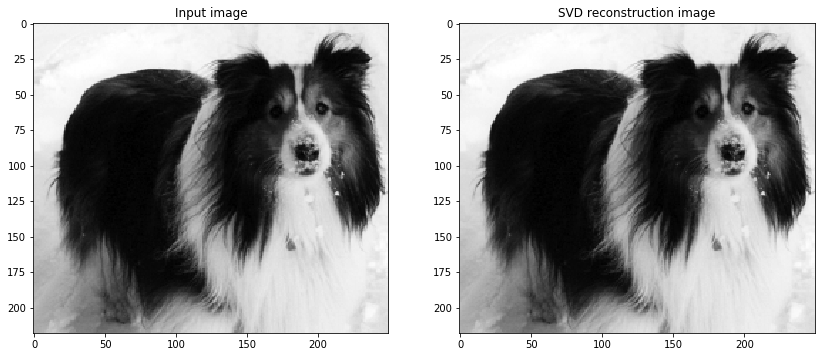

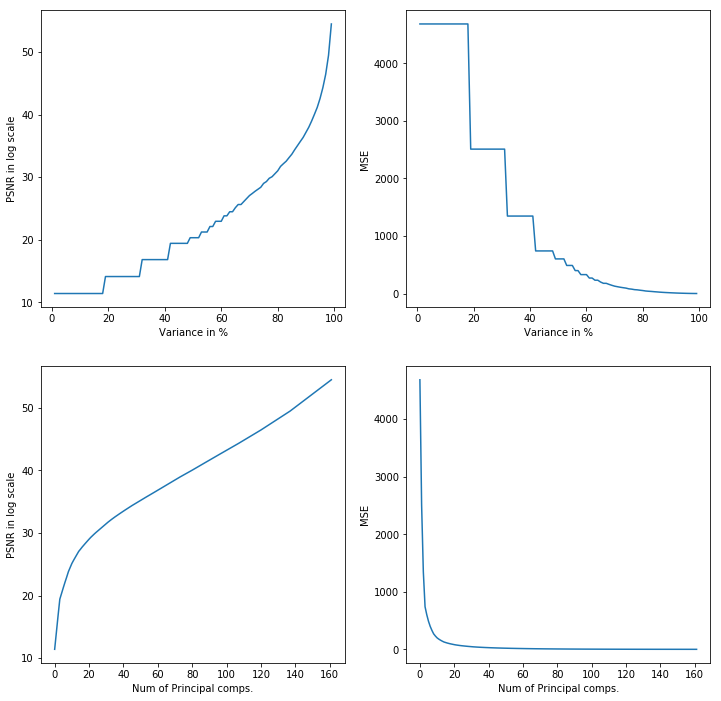

You can input required variance or it'll be considered as 99%.
Do you want to specify percentage of variance required in reconstructed image? Type Y/N: 
Y
Please specify the amount of variance required in the compressed image between 1 to 99 
 (usually between 90 to 99 is good) 
89
The PCA reconstruction with 89 % of Variance is 
 [[255.         241.95310762 241.85131894 ... 238.48660044 237.60073748
  237.90499427]
 [255.         241.97711745 242.00249487 ... 238.25684909 237.17771896
  237.33635255]
 [255.         242.64400257 242.77197627 ... 238.73173505 237.86545118
  237.95364983]
 ...
 [254.68541285 174.09539873 172.6981007  ... 223.84120521 223.33285224
  222.14887174]
 [254.05399024 176.36652373 174.87961789 ... 222.37540676 221.9952171
  220.93949438]
 [254.08583801 180.9294679  179.84255849 ... 221.48297055 221.58712929
  220.74409303]]


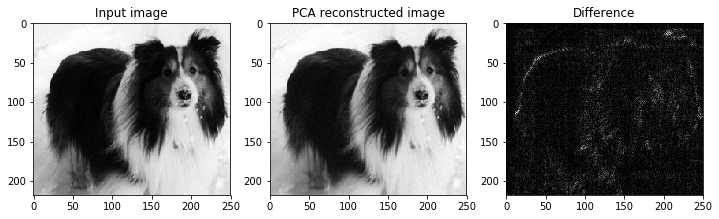

In [15]:
#For image1
svd_analysis(img1)
pc_analysis(img1)
for_specific_variance(img1)

Original image matrix entries: 
 [[110.  98. 103. ...  89. 117.  92.]
 [114. 107. 101. ...  76.  86.  60.]
 [ 97.  86. 111. ...  76.  67.  43.]
 ...
 [122.  65.  63. ...  30. 129.  43.]
 [122.  65.  86. ...  34.  61.  29.]
 [ 98.  52.  61. ... 119.  34. 120.]]

 

SVD reconstructed image matrix entries: 
 [[110.00000864  97.99999151 102.99998617 ...  89.00000605 117.00000056
   92.00000602]
 [113.99999553 106.99998615 100.99997015 ...  75.99998285  85.99998713
   59.99998224]
 [ 96.99999703  86.00000584 110.9999883  ...  75.99998521  66.99999417
   42.99999689]
 ...
 [121.99999667  65.00000005  62.99999924 ...  29.9999999  129.00000008
   42.99999612]
 [122.0000006   64.99999988  86.00000528 ...  34.00000325  61.00000054
   28.99999746]
 [ 98.00000443  51.999998    60.99999806 ... 118.99999931  33.99999842
  120.00000217]]


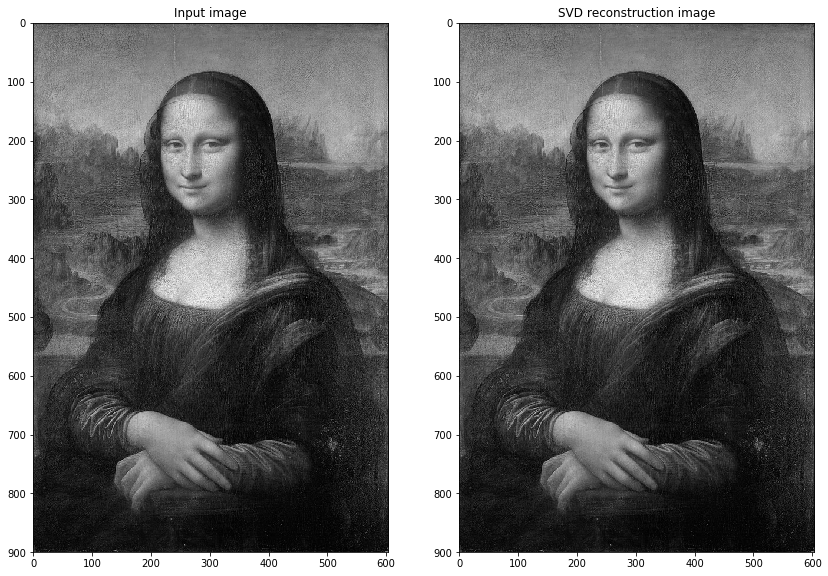

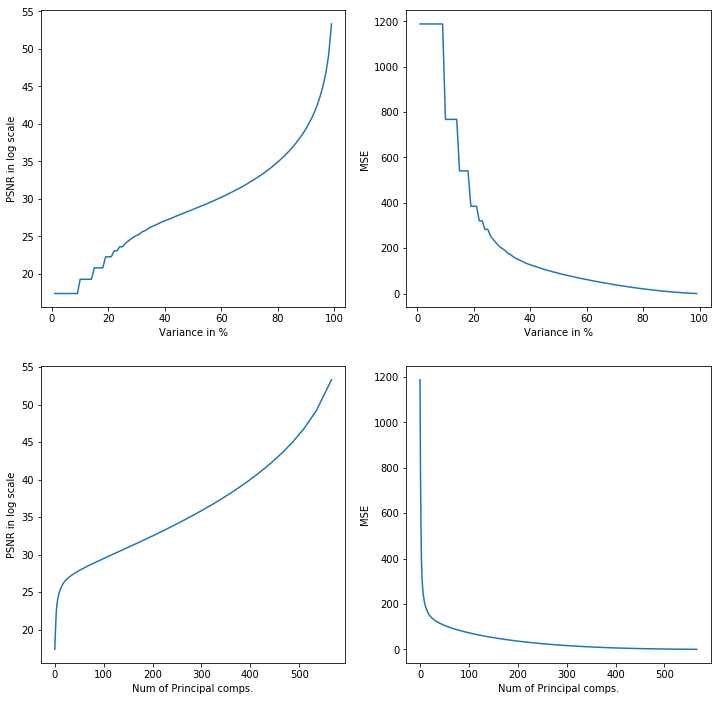

You can input required variance or it'll be considered as 99%.
Do you want to specify percentage of variance required in reconstructed image? Type Y/N: 
N
The PCA reconstruction with 99 % of Variance is 
 [[109.73840089  96.83197441 103.63032612 ...  89.05676724 117.28088749
   92.19809441]
 [113.93984593 107.12758825 100.77183421 ...  76.20110731  85.57500186
   60.28712928]
 [ 97.0975665   85.72224347 111.51490979 ...  76.4790852   66.70430479
   42.8118707 ]
 ...
 [122.22145695  65.28306483  63.14171701 ...  30.59340573 127.99695173
   42.41535327]
 [121.7655692   64.80429357  86.37776207 ...  33.89431157  60.86749868
   29.91908062]
 [ 97.56033077  51.38210705  60.97226059 ... 118.85965848  34.54176152
  119.58384447]]


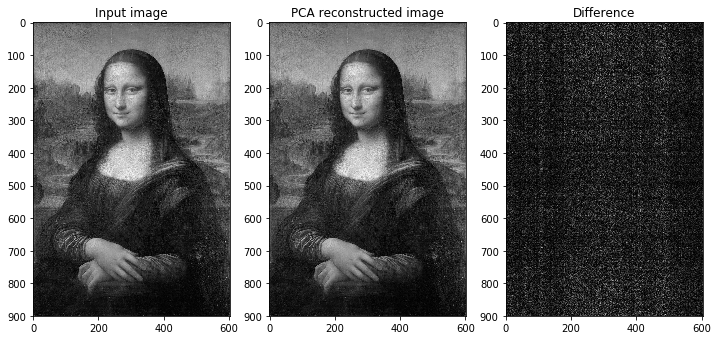

In [23]:
#For image 2
svd_analysis(img2)
pc_analysis(img2)
for_specific_variance(img2)

Original image matrix entries: 
 [[  7.   7.   7. ... 137. 134. 134.]
 [  7.   7.   7. ... 137. 135. 135.]
 [  7.   7.   7. ... 138. 136. 136.]
 ...
 [ 22.  22.  22. ...  40.  43.  43.]
 [ 22.  23.  24. ...  39.  42.  42.]
 [ 22.  24.  25. ...  41.  41.  41.]]

 

SVD reconstructed image matrix entries: 
 [[  7.00000106   7.00000214   6.99999539 ... 136.9999877  133.99999045
  133.99999245]
 [  6.99999944   7.00000365   6.99999633 ... 136.99999112 134.99999352
  134.99999304]
 [  7.00000117   7.00000227   6.99999974 ... 137.99998495 135.99998667
  135.99999032]
 ...
 [ 22.0000062   21.9999967   22.00000007 ...  40.00000046  42.99999864
   43.00000092]
 [ 21.99999482  23.00000484  23.99999928 ...  38.99998987  41.99999978
   41.99999947]
 [ 22.00000177  23.9999972   24.99999679 ...  40.99999978  40.99999439
   40.99999741]]


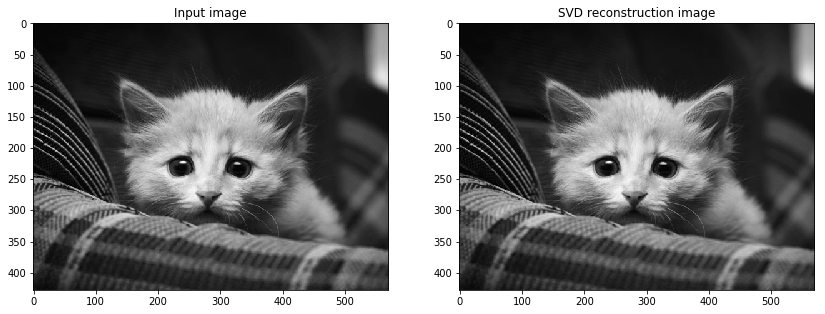

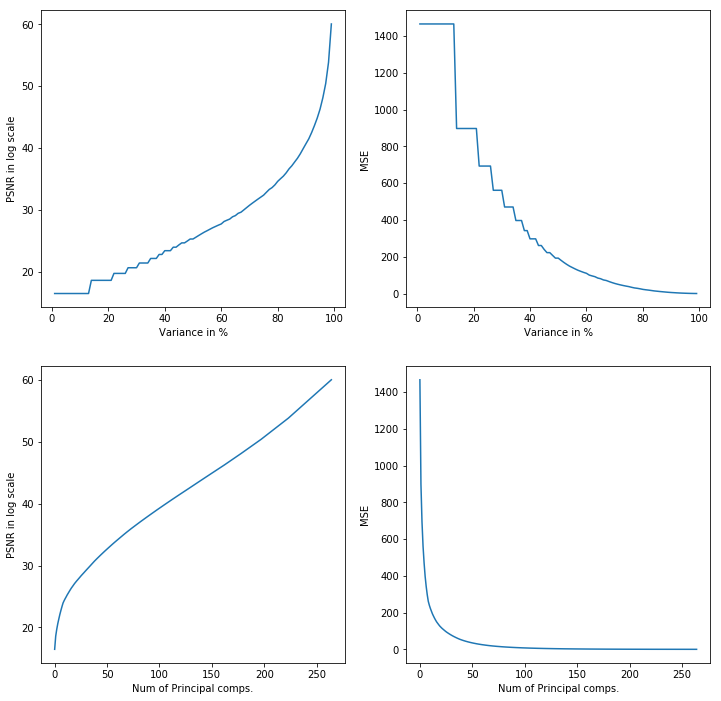

You can input required variance or it'll be considered as 99%.
Do you want to specify percentage of variance required in reconstructed image? Type Y/N: 
Y
Please specify the amount of variance required in the compressed image between 1 to 99 
 (usually between 90 to 99 is good) 
70
The PCA reconstruction with 70 % of Variance is 
 [[  9.9098281    8.96778041   8.30053858 ... 141.8255686  141.34558913
  141.42882314]
 [  9.64319676   8.7745089    8.18356682 ... 142.42405968 141.90185909
  141.94847603]
 [  9.50338859   8.56639811   8.04675445 ... 143.29292278 142.75517755
  142.78690378]
 ...
 [ 25.89305912  24.049688    18.42719682 ...  44.88535614  45.15210454
   46.75977151]
 [ 27.29075737  24.79631266  19.03621403 ...  43.7595565   44.2475106
   45.99094424]
 [ 28.37948477  25.19789918  19.72905581 ...  43.37606196  44.04503531
   45.83568814]]


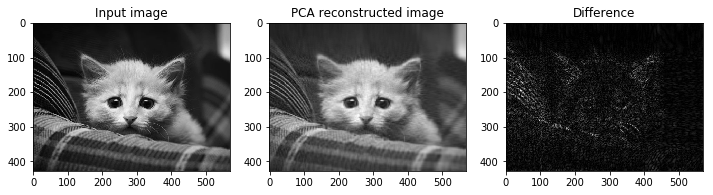

In [25]:
#For image 3
svd_analysis(img3)
pc_analysis(img3)
for_specific_variance(img3)

Original image matrix entries: 
 [[160. 161. 161. ... 182. 183. 184.]
 [156. 158. 158. ... 183. 183. 183.]
 [156. 157. 158. ... 184. 183. 182.]
 ...
 [154. 154. 153. ... 105. 100. 104.]
 [154. 153. 153. ... 104. 101. 105.]
 [152. 153. 154. ... 103. 102. 108.]]

 

SVD reconstructed image matrix entries: 
 [[159.99998202 161.00000987 160.99995234 ... 182.00001397 183.00000948
  183.99998101]
 [155.99996979 157.99998781 157.99997387 ... 183.00008756 183.00000744
  182.99998918]
 [155.99997249 156.99996421 157.99997899 ... 184.00004736 183.00001791
  181.99996234]
 ...
 [153.99999591 153.99998957 153.00000054 ... 105.00000412 100.00001953
  104.00002967]
 [153.99999562 152.99996432 152.99997691 ... 104.00000639 101.00000486
  104.99999893]
 [151.99999738 152.99999171 153.99999401 ... 102.99999443 102.00001821
  107.99999296]]


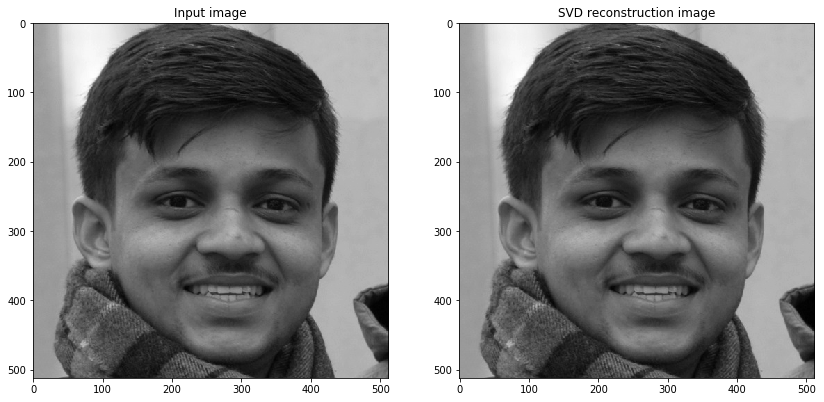

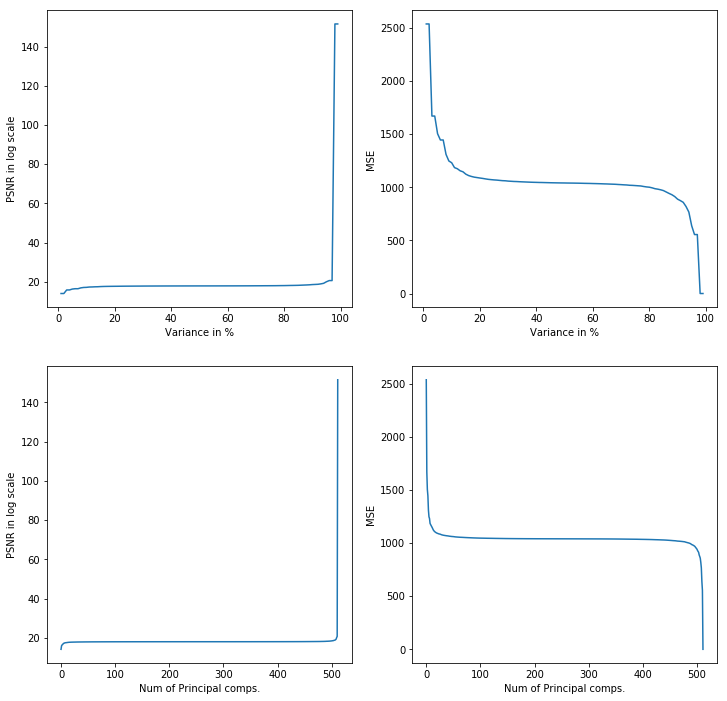

You can input required variance or it'll be considered as 99%.
Do you want to specify percentage of variance required in reconstructed image? Type Y/N: 
Y
Please specify the amount of variance required in the compressed image between 1 to 99 
 (usually between 90 to 99 is good) 
90
The PCA reconstruction with 90 % of Variance is 
 [[228.69070667 230.07125045 230.2486221  ... 116.18792841 117.98322712
  121.81587114]
 [220.64026555 223.14243698 223.34422844 ... 118.97389366 120.65599291
  124.50147343]
 [217.73554601 219.27810207 220.46993647 ... 122.00229946 123.65611717
  126.92627362]
 ...
 [115.55313599 115.36702957 113.99393213 ... 179.84524958 173.98027171
  176.81772963]
 [115.72250103 114.50435513 114.11744831 ... 177.87270235 175.39664749
  179.02419689]
 [114.33994527 115.12715975 115.75318054 ... 175.76128127 176.08445783
  182.64198045]]


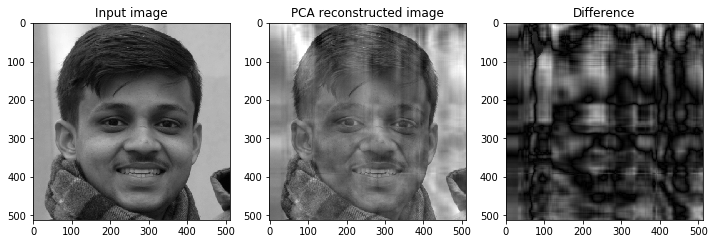

In [26]:
#for image 4
svd_analysis(img4)
pc_analysis(img4)
for_specific_variance(img4)

Original image matrix entries: 
 [[131. 137. 131. ...  96.  96.  96.]
 [132. 135. 133. ...  96.  98.  99.]
 [134. 132. 135. ...  98.  99. 100.]
 ...
 [110. 109. 114. ...  47.  47.  48.]
 [107. 109. 111. ...  47.  47.  51.]
 [101. 107. 109. ...  47.  48.  54.]]

 

SVD reconstructed image matrix entries: 
 [[130.99997893 136.99997621 130.99999602 ...  95.99999883  96.00000623
   96.00000492]
 [132.00001022 134.99999877 133.00001803 ...  96.00000587  98.00002026
   98.99999253]
 [133.99999246 131.99996512 135.00000435 ...  97.99999358  99.00000656
   99.99998243]
 ...
 [109.99999156 108.99999646 113.99999661 ...  47.00000512  46.99999851
   47.9999892 ]
 [106.9999802  108.99999511 110.99998934 ...  47.0000144   46.99998989
   51.00000773]
 [100.99999854 106.99998146 108.9999983  ...  47.00000131  47.99997627
   54.00000226]]


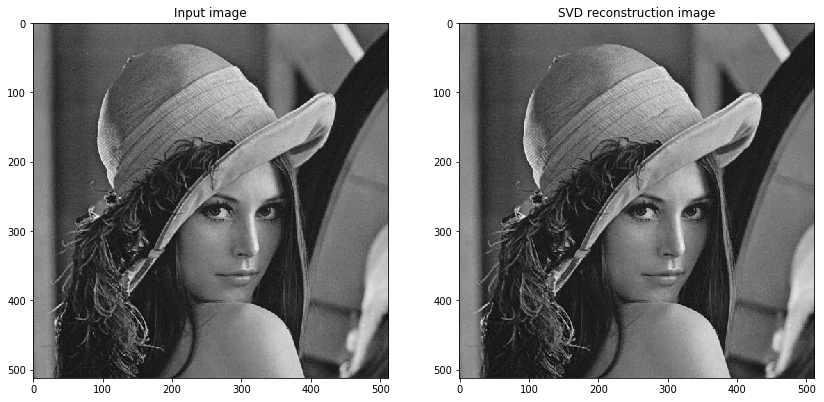

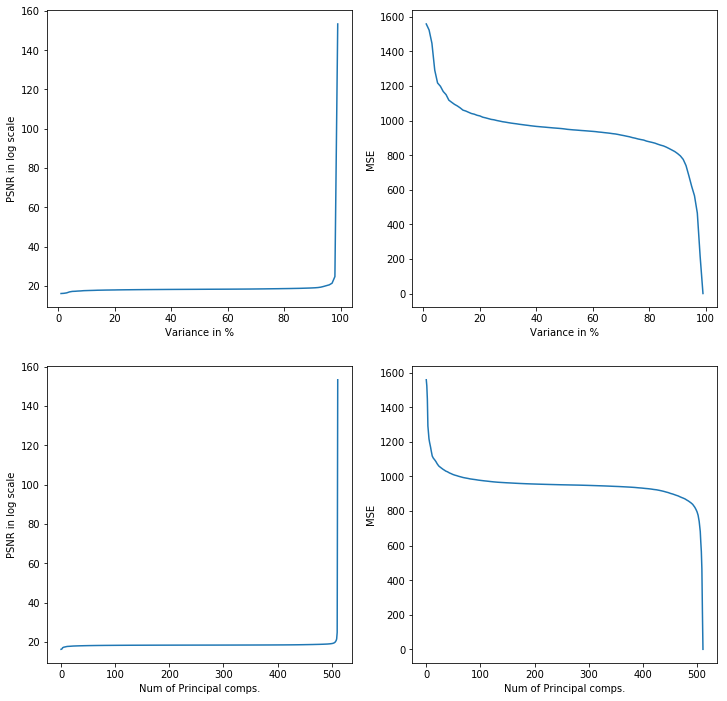

You can input required variance or it'll be considered as 99%.
Do you want to specify percentage of variance required in reconstructed image? Type Y/N: 
N
The PCA reconstruction with 99 % of Variance is 
 [[130.99999716 136.99999612 131.00000102 ...  96.00000238  95.99999649
   96.00000164]
 [131.99999804 135.00000093 133.00000267 ...  95.99999398  97.99999943
   98.99999941]
 [134.00000002 132.00000439 134.99999701 ...  97.99999983  98.99999549
   99.99999948]
 ...
 [109.99999931 109.00000336 113.99999843 ...  47.00000124  46.99999238
   47.99998558]
 [106.99999434 108.99999922 110.99999231 ...  47.00001586  47.00000964
   51.00000346]
 [100.99999266 106.99999266 108.99998915 ...  47.00000366  47.99998769
   53.99999549]]


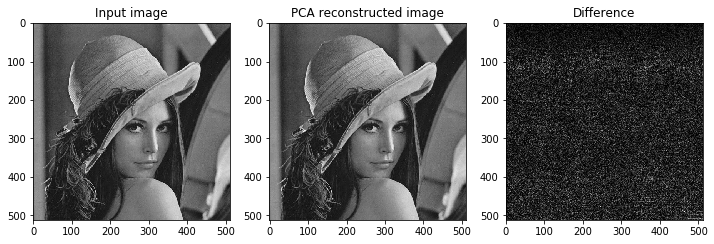

In [27]:
#for image 5
svd_analysis(img5)
pc_analysis(img5)
for_specific_variance(img5)

Original image matrix entries: 
 [[220. 220. 220. ... 214. 214. 214.]
 [220. 220. 220. ... 214. 214. 214.]
 [220. 220. 220. ... 214. 214. 214.]
 ...
 [197. 197. 197. ... 185. 185. 185.]
 [195. 195. 195. ... 185. 185. 185.]
 [197. 197. 197. ... 185. 185. 185.]]

 

SVD reconstructed image matrix entries: 
 [[220.00000333 220.00002984 220.0000118  ... 214.00001907 214.00001129
  214.0000071 ]
 [219.99996627 220.00000736 220.00002299 ... 213.99998589 214.0000188
  214.00000656]
 [220.00000593 219.99998046 219.99997019 ... 213.9999888  213.99997122
  213.99999904]
 ...
 [197.00001825 197.00002385 197.00002919 ... 184.99997676 184.99999437
  184.99998015]
 [195.00000842 195.00000786 194.99998342 ... 184.9999911  184.99998666
  185.00001932]
 [197.00000267 196.99999752 196.99994829 ... 184.99995754 184.99998522
  184.9999968 ]]


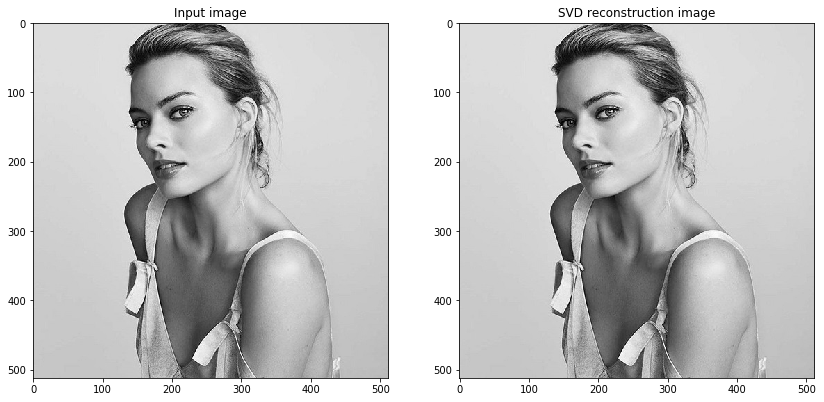

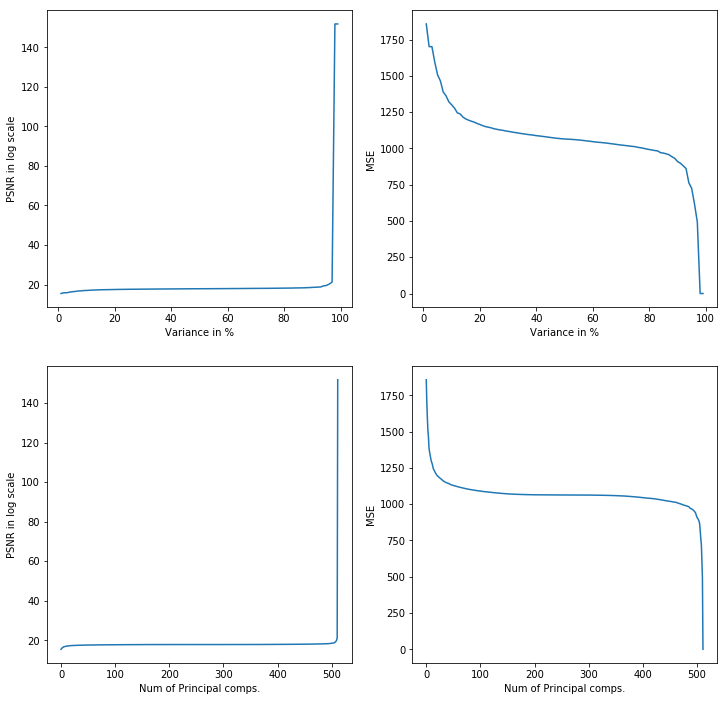

You can input required variance or it'll be considered as 99%.
Do you want to specify percentage of variance required in reconstructed image? Type Y/N: 
Y
Please specify the amount of variance required in the compressed image between 1 to 99 
 (usually between 90 to 99 is good) 
85
The PCA reconstruction with 85 % of Variance is 
 [[222.58486562 222.84871879 222.83700139 ... 220.19258148 219.72629248
  219.60442218]
 [221.18816373 221.27054656 221.22517912 ... 231.80027894 231.61118748
  232.66858135]
 [219.38679244 219.16801796 219.14139014 ... 247.58375634 245.55569272
  247.11743066]
 ...
 [187.58891822 187.38387591 187.51787699 ... 255.         255.
  255.        ]
 [185.36850641 185.15261406 185.27403475 ... 255.         255.
  255.        ]
 [187.46442108 187.22750149 187.34936054 ... 255.         255.
  255.        ]]


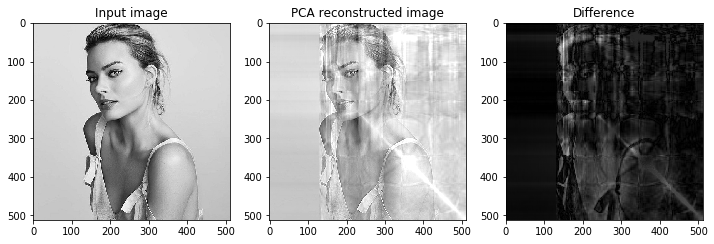

In [28]:
#for image 6
svd_analysis(img6)
pc_analysis(img6)
for_specific_variance(img6)